# Test on single audio

* specify the file on which to perform the prediction
* specify the pretrained model
* single audio in .wav format

In [12]:
from predict import main

absolute_path_to_model = '/home/stas/UnsupSeg/Trained/epoch=8.ckpt' 
path_to_audio = '/home/stas/UnsupSeg/data/felix/datasets/timit/test/timit_big_data_TEST_DR1_FAKS0_SI943.wav'
prominence = 0.15

# make prediction for chosen .wav file, but don't write file with scores and boundaries
preds_seconds, preds_pixels = main(path_to_audio, absolute_path_to_model, prominence, writefile = False)

running inference on: /home/stas/UnsupSeg/data/felix/datasets/timit/test/timit_big_data_TEST_DR1_FAKS0_SI943.wav
running inferece using ckpt: /home/stas/UnsupSeg/Trained/epoch=8.ckpt


 ------------------------------------------------------------------------------------------
learning features from raw wav
prediction steps: [1]
overriding prominence with 0.15
cpu
predicted boundaries (in seconds):
[0.18 0.21 0.69 0.72 0.79 0.82 0.93 0.97 1.12 1.3  1.42 1.54 1.58 1.68
 1.76 1.83 1.88 1.9  1.96 1.99 2.02 2.08 2.16 2.27 2.31 2.43 2.46 2.49
 2.55 2.57 2.6  2.62 2.73 2.78 2.83 2.89 2.93 2.97 3.1  3.23 3.28 3.43
 3.59]
predicted boundaries (in pixels):
[ 18  21  69  72  79  82  93  97 112 130 142 154 158 168 176 183 188 190
 196 199 202 208 216 227 231 243 246 249 255 257 260 262 273 278 283 289
 293 297 310 323 328 343 359]
predicted segments:
44


# Saving test results: phonemas, boundaries, scores (for the following clasterization)
* set write_data = True
* specify the test data folder
* specify the pretrained model

In [ ]:
import os
import h5py
from predict import main

# Create files with spectrums, boundaries and scores
write_data = True

# if yes, then create empty files
if write_data == True:
    # create file for data
    with h5py.File('Phonemas.hdf5', 'w') as f:
        f.close()
    with h5py.File('Boundaries.hdf5', 'w') as f:
        f.close()
    with h5py.File('Scores.hdf5', 'w') as f:
        f.close()

# test data and model folders
test_data = '/home/stas/UnsupSeg/data/felix/datasets/timit/test'
absolute_path_to_model = '/home/stas/UnsupSeg/Trained/epoch=8.ckpt' 
prominence = 0.15

# for each file in train data make predibtion
for root, dirs, files in os.walk(test_data):
    for file in files:
        if file.endswith('.wav'):
            corrent_wav_path = os.path.join(test_data,file)
            print(corrent_wav_path)
            preds_seconds, preds_pixels = main(corrent_wav_path, absolute_path_to_model, prominence, writefile = write_data)

# Extract data to be processed from files

In [10]:
def read_data():
    
    import h5py
    
    phonemas = []
    boundaries = []
    scores = []
    realbounds = []

    with h5py.File('Phonemas.hdf5', 'r') as f:
        print('phonemas file size ',len(f.keys()))
        for i in range(int(len(f.keys()))):
            phonemas.append(f['phoneme_'+str(i)][:])

    with h5py.File('Boundaries.hdf5', 'r') as f:
        print('boundaries file size',len(f.keys()))
        for i in range(int(len(f.keys()))):
            boundaries.append(f['bounds_'+str(i)][:])

    with h5py.File('Scores.hdf5', 'r') as f:
        print('scores file size',len(f.keys()))
        for i in range(int(len(f.keys()))):
            scores.append(f['scores_'+str(i)][:])
            
    with h5py.File('Realbounds.hdf5', 'r') as f:
        print('realbounds file size',len(f.keys()))
        for i in range(int(len(f.keys()))):
            realbounds.append(f['real_bound_'+str(i)][:])

    # phonema slicing
    phonema_sliced = []
    for spectrum_idx in range(len(phonemas)):
#         print('spectrum '+str(spectrum_idx+1)+' is processing')
        
        for bound_idx in range(len(boundaries[spectrum_idx])-1):
            phonema = phonemas[spectrum_idx][:,boundaries[spectrum_idx][bound_idx]:boundaries[spectrum_idx][bound_idx+1]].sum(axis = 1).reshape(64,1)
            phonema_sliced.append(phonema)
        
    print()
    print('Merged phonemas: ',len(phonemas))
    print('Boundaries: ',len(boundaries))
    print('Scores: ',len(scores))
    print('Real bounds: ',len(realbounds))
    print()
    print('Separate phonemas detected:',len(phonema_sliced))
    return phonemas, boundaries, scores, phonema_sliced, realbounds

phonemas, boundaries, scores, phonema_sliced, realbounds = read_data()

phonemas file size  1680
boundaries file size 1680
scores file size 1680
realbounds file size 1680

Merged phonemas:  1680
Boundaries:  1680
Scores:  1680
Real bounds:  1680

Separate phonemas detected: 64746


# Plot example of data: spectral reprezentation, score and boundaries

1680 1680 1680
(64, 446) (65,) (445,)
[ 13.  17.  25.  31.  39.  45.  50.  56.  57.  59.  63.  70.  72.  77.
  84.  98. 114. 118. 129. 132. 134. 136. 140. 150. 154. 167. 170. 172.
 174. 180. 183. 187. 193. 197. 198. 205. 219. 226. 228. 231. 233. 237.
 238. 248. 256. 258. 267. 272. 275. 281. 286. 289. 296. 305. 316. 326.
 338. 349. 354. 359. 362. 371. 375. 386. 393. 396. 399. 402. 405. 412.
 424. 433.]
559


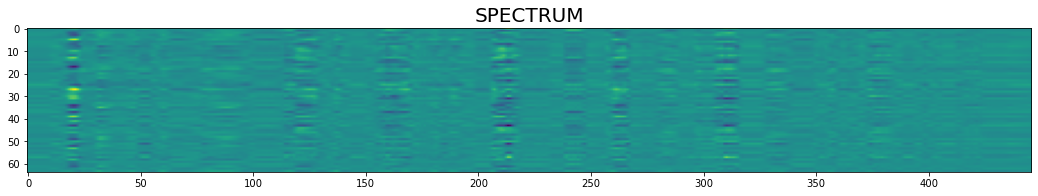

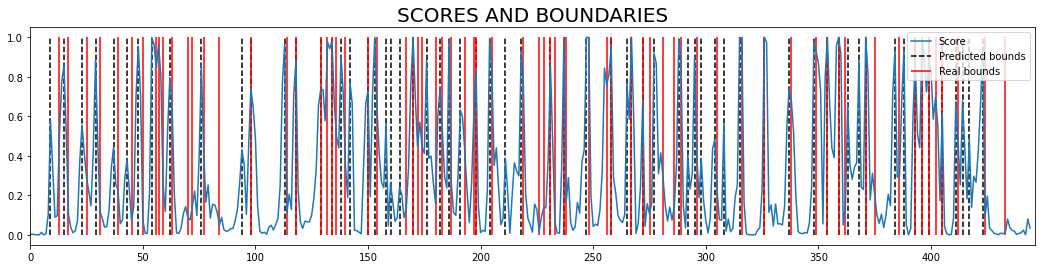

In [56]:
import numpy as np
import matplotlib.pyplot as plt

m = np.random.randint(len(phonemas))

plt.figure(figsize=(18,4))

plt.title('SPECTRUM',fontsize = 20)
plt.imshow(phonemas[m])
plt.figure(figsize=(18,4))

plt.title('SCORES AND BOUNDARIES',fontsize = 20)
plt.plot(scores[m],label='Score')

plt.xlim([0,phonemas[m].shape[1]])
plt.vlines(boundaries[m], 0, 1, linestyles ="dashed", colors ="k",label='Predicted bounds')
plt.vlines(realbounds[m], 0, 1, linestyles ="solid", colors ="r",label='Real bounds')
plt.legend()

print(len(phonemas), len(boundaries), len(scores))
print(phonemas[m].shape, boundaries[m].shape, scores[m].shape)

print(realbounds[m])

print(m)

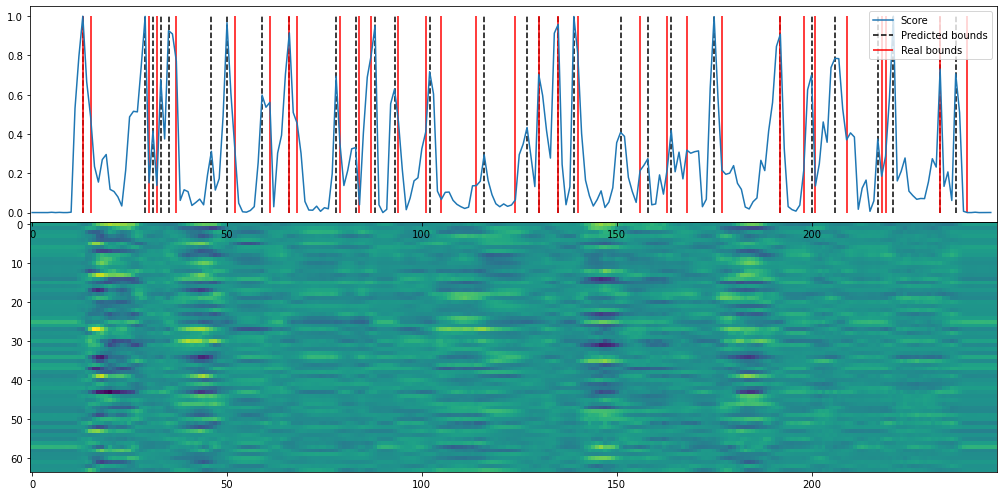

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np; np.random.seed(0)

fig, ax = plt.subplots(figsize=(20,7))

ax.imshow(phonemas[m])

divider = make_axes_locatable(ax)
axtop = divider.append_axes("top", size=3, pad=0, sharex=ax)
axtop.plot(scores[m],label='Score')
axtop.vlines(boundaries[m], 0, 1, linestyles ="dashed", colors ="k",label='Predicted bounds')
axtop.vlines(realbounds[m], 0, 1, linestyles ="solid", colors ="r",label='Real bounds')
axtop.margins(x=0)
plt.legend()

plt.tight_layout()
plt.show()

# Main for training and testing

* To train use ckpt: null in config.yaml
* To train use ckpt: absolute_path_to_training_data in config.yaml
* don't forget to set up folders with training data

In [ ]:
import yaml
import os
import random
import socket
from argparse import Namespace
from distutils.dir_util import copy_tree

import hydra
import numpy as np
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from torch.backends import cudnn

from solver import Solver
torch.autograd.set_detect_anomaly(True)

import h5py

write_data = True

def main():
    
    if write_data == True:
        # create file for data
        with h5py.File('Spectrum.hdf5', 'w') as f:
            f.close()
    
    with open('config.yaml') as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
        cfg = yaml.load(file, Loader=yaml.FullLoader)
    cfg = Namespace(**dict(cfg))
    
    torch.manual_seed(cfg.seed)
    np.random.seed(cfg.seed)
    random.seed(cfg.seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    print(f"running in: {os.getcwd()}")
    cfg.wd = os.getcwd()
    cfg.host = socket.gethostname()
    cfg.project = "default" if not hasattr(cfg, "project") else cfg.project

    checkpoint_callback = ModelCheckpoint(
        filepath=os.getcwd(),
        save_top_k=1,
        verbose=True,
        monitor=cfg.early_stop_metric,
        mode=cfg.early_stop_mode,
        prefix='',
    )

    trainer = Trainer(
        checkpoint_callback=checkpoint_callback,
        early_stop_callback=None,
        distributed_backend="dp",
        show_progress_bar=True,
        num_sanity_val_steps=0,
        track_grad_norm=2,
        print_nan_grads=True,
        gpus=cfg.gpus,
        gradient_clip_val=cfg.grad_clip,
        val_check_interval=cfg.val_check_interval,
        fast_dev_run=cfg.dev_run,
        max_epochs=cfg.epochs
    )

    if cfg.ckpt is not None:
        ckpt = cfg.ckpt
    else:
        solver = Solver(cfg, writefile = write_data)

        print('START FITTING')
        trainer.fit(solver)
        print('END FITTING')

        ckpt = solver.get_ckpt_path()

    print(f"running test on ckpt: {ckpt}")
    print(f"testing for {cfg.data.upper()}")
    solver = Solver.load_from_checkpoint(ckpt)

    # override checkpoint paths with current conf paths
    solver.hp.timit_path = cfg.timit_path
    solver.hp.buckeye_path = cfg.buckeye_path
    solver.hp.arabic_path = cfg.arabic_path
    solver.hp.libri_path = cfg.libri_path
    
    solver.hp.data = cfg.data
    
    print('START TEST')
    trainer.test(solver)
    print('END TEST')

if __name__ == "__main__":
    main()

# TIMIT parser

In [ ]:
import os
import shutil

inpath = 'other/timit_big/data' # TIMIT in location
outpath = 'other/timit_big_parsed' # TIMIT out location
# to create "other" folder,+train, +test

def big_timit_parser(inpath, outpath):
    for root, dirs, files in os.walk(inpath):
        for file in files:
            if file.endswith('.PHN') or file.endswith('.wav'):
                src_name = "{}/{}".format(root, file)
                
                if "TEST" in src_name:
                    print(src_name)
                    fold = "test"
                    tgt_name = os.path.join(outpath,fold,src_name.replace("/", "_"))
                    if ".WAV" in tgt_name:
                        tgt_name = tgt_name.replace('.WAV', '')


                if "TRAIN" in src_name:
                    print(src_name)
                    fold = "train"
                    tgt_name = os.path.join(outpath,fold,src_name.replace("/", "_"))
                    if ".WAV" in tgt_name:
                        tgt_name = tgt_name.replace('.WAV', '')
                shutil.copy(src_name, tgt_name)

big_timit_parser(inpath, outpath)

# Data loaders testing

### Arabic datset loading

In [14]:
import numpy as np
from dataloader import TrainTestDataset

path = 'data/felix/datasets/arabic'
train, val, test = TrainTestDataset.get_datasets(path=path)

print("DATA:")
print(f"train: {path} {len(train)}")
print(f"valid: {path} {len(val)}")
print(f"test: {path} {len(test)}")

DATA:
train: data/felix/datasets/arabic 0
valid: data/felix/datasets/arabic 0
test: data/felix/datasets/arabic 1813


In [15]:
random_sample = 0
display(test[random_sample][0])
N = 15 # how much data to show
print()
print('AUDIO =    ', test[random_sample][1][:N])
print()
print('PHONEMES = ', test[random_sample][2][:N])
print()
print('LENGTH =   ', test[random_sample][3])
print()
print('PATH =    ', test[random_sample][4])

tensor([0., 0., 0.,  ..., 0., 0., 0.])


AUDIO =     [21.0, 29.0, 33.0, 43.0, 49.0, 54.0, 65.0, 71.0, 78.0, 81.0, 100.0, 104.0, 113.0, 123.0, 127.0]

PHONEMES =  ['sil', 'w', 'a', 'k', "a'", 'y', 'f', 'a', 't', 'a', 'E', "a'", 'rr', 'A', 'D']

LENGTH =    863

PATH =     data/felix/datasets/arabic/test/1000.wav


### TIMIT datset loading

In [16]:
import numpy as np
from dataloader import TrainTestDataset

path = 'data/felix/datasets/timit'
train, val, test = TrainTestDataset.get_datasets(path=path)

print("DATA:")
print(f"train: {path} {len(train)}")
print(f"valid: {path} {len(val)}")
print(f"test: {path} {len(test)}")

DATA:
train: data/felix/datasets/timit 4158
valid: data/felix/datasets/timit 462
test: data/felix/datasets/timit 1680


In [17]:
random_sample = 1267
display(test[random_sample][0])
N = 20022 # how much data to show
print()
print('AUDIO =    ', test[random_sample][1][:N])
print()
print('PHONEMES = ', test[random_sample][2][:N])
print()
print('LENGTH =   ', test[random_sample][3])
print()
print('PATH =    ', test[random_sample][4])

tensor([7.6294e-04, 9.1553e-04, 6.1035e-04,  ..., 3.0518e-04, 6.1035e-05,
        4.5776e-04])


AUDIO =     [18.0, 25.0, 37.0, 40.0, 49.0, 57.0, 62.0, 69.0, 74.0, 78.0, 79.0, 93.0, 101.0, 108.0, 111.0, 115.0, 130.0, 139.0, 145.0, 154.0, 161.0, 171.0, 173.0, 180.0, 197.0, 208.0, 212.0, 216.0, 224.0, 233.0, 238.0, 241.0, 243.0, 262.0, 267.0, 273.0, 278.0, 298.0, 306.0]

PHONEMES =  ['h#', 'l', 'ay', 'dx', 'ih', 'dcl', 'w', 'ih', 'n', 'dcl', 'd', 'ow', 'z', 'gcl', 'g', 'l', 'ow', 'dcl', 'jh', 'ux', 'l', 'bcl', 'b', 'r', 'ay', 'tcl', 'th', 'r', 'ux', 'dh', 'ix', 'dcl', 'd', 'aw', 'n', 'pcl', 'p', 'ao', 'r', 'h#']

LENGTH =    321

PATH =     data/felix/datasets/timit/test/timit_big_data_TEST_DR5_FNLP0_SI1938.wav


## Save real bounds

In [7]:
import h5py

with h5py.File('Realbounds.hdf5', 'w') as f:
        f.close()

for num in range(len(test)):
    with h5py.File('Realbounds.hdf5', 'a') as f:
        length = len(f.keys())
        for i in range(1):
            f.create_dataset('real_bound_'+str(i + length), data = np.array(test[num][1]))
        f.close()

In [8]:
realbounds = []
with h5py.File('Realbounds.hdf5', 'r') as f:
    print('realbounds file ',len(f.keys()))
    for i in range(int(len(f.keys()))):
        realbounds.append(f['real_bound_'+str(i)][:])
len(realbounds)

realbounds file  2


2

### BUCKEYE datset loading

In [19]:
import numpy as np
from dataloader import TrainValTestDataset

path = 'data/felix/datasets/buckeye'
train, val, test = TrainValTestDataset.get_datasets(path=path)

print("DATA:")
print(f"train: {path} {len(train)}")
print(f"valid: {path} {len(val)}")
print(f"test: {path} {len(test)}")

DATA:
train: data/felix/datasets/buckeye 204
valid: data/felix/datasets/buckeye 25
test: data/felix/datasets/buckeye 25


In [20]:
random_sample = 0
display(test[random_sample][0])
N = 15 # how much data to show
print()
print('AUDIO =    ', test[random_sample][1][:N])
print()
print('PHONEMES = ', test[random_sample][2][:N])
print()
print('LENGTH =   ', test[random_sample][3])
print()
print('PATH =    ', test[random_sample][4])

tensor([-0.0009, -0.0009, -0.0007,  ...,  0.0001, -0.0003, -0.0003])


AUDIO =     [0.0, 10.0, 13.0, 17.0, 28.0, 36.0, 42.0, 45.0, 50.0, 58.0, 64.0, 68.0, 71.0, 76.0, 83.0]

PHONEMES =  ['ng', 'ih', 'th', '{B_TRANS}', 'IVER', 'ih', 'z', 'ih', 'k;', 's', 't', 'r', 'ao', 'r;', 'd;']

LENGTH =    4927

PATH =     data/felix/datasets/buckeye/test/s3201b.wav


In [ ]:
print('fvdvfdvbfdvbf')